In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#printing head(top 5 rows)
df=pd.read_csv('Meteorite Landing - Meteorite-Landings.csv')
df.head()

,Name,ID,NameType,Classification,Mass,Fall,Year,Coordinates
0,Aachen,1,Valid,L5,"Quantity[21, ""Grams""]",Fell,"DateObject[{1880}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{50.775, 6.08333}]"
1,Aarhus,2,Valid,H6,"Quantity[720, ""Grams""]",Fell,"DateObject[{1951}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{56.18333, 10.23333}]"
2,Abee,6,Valid,EH4,"Quantity[107000, ""Grams""]",Fell,"DateObject[{1952}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{54.21667, -113.}]"
3,Acapulco,10,Valid,Acapulcoite,"Quantity[1914, ""Grams""]",Fell,"DateObject[{1976}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{16.88333, -99.9}]"
4,Achiras,370,Valid,L6,"Quantity[780, ""Grams""]",Fell,"DateObject[{1902}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{-33.16667, -64.95}]"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            45716 non-null  object
 1   ID              45716 non-null  int64 
 2   NameType        45716 non-null  object
 3   Classification  45716 non-null  object
 4   Mass            45716 non-null  object
 5   Fall            45716 non-null  object
 6   Year            45716 non-null  object
 7   Coordinates     45716 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.8+ MB


In [4]:
df["Mass"].describe()
df["Year"].describe()
df["Coordinates"].describe()


count                       45716
unique                      17100
top       Missing["NotAvailable"]
freq                        13529
Name: Coordinates, dtype: object

In [5]:
#Seprating Coordinats into latitude and longitude
df['Coordinates'] = df['Coordinates'].astype(str)  #ensuring its assessed as string, not any other data type
df['Clean_Coordinates'] = df['Coordinates'].str.replace('GeoPosition[{', '', regex=False).str.replace('}]', '', regex=False)# data cleaning(Ensuring the numerical value of latitude and longitudes are acessed)
coords_split = df['Clean_Coordinates'].str.split(', ', expand=True) #seprating them through comma
#Making new column for latitude and longitude 
df['Latitude'] = pd.to_numeric(coords_split[0], errors='coerce') # Filtering errorneous data 
df['Longitude'] = pd.to_numeric(coords_split[1], errors='coerce')

In [6]:
#inorder to handle missing values, finding out count of them so that we can accrodingly work on them.
missing_coords_count = df['Latitude'].isna().sum() 
print(f"Number of rows with missing coordinates: {missing_coords_count}")

Number of rows with missing coordinates: 13529


In [7]:
# Drop rows where either Latitude or Longitude is NaN . We cannot insert it with mean ,median because its the co-ordinates and doing that will make them loose its significance
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)


In [8]:
#  MASS CLEANING :
df['Mass'] = df['Mass'].astype(str)
df['Mass_g'] = df['Mass'].str.extract(r'\[(\d+\.?\d*)\,')#using regex to extract the number present in the column, since the number is its mass. 
#Mking new Column
df['Mass_g'] = pd.to_numeric(df['Mass_g'], errors='coerce')#Filtering out errorneous data

In [9]:
# Check how many Mass_g values are missing, if the missing values are less we can put median in there , median ensures that outliers are not included.
missing_mass_count = df['Mass_g'].isna().sum()
print(f"Number of missing Mass_g values: {missing_mass_count}")
# 1. Calculate the median mass
median_mass = df['Mass_g'].median()

# 2. Fill the missing values with the calculated median. Handling missing values
df['Mass_g'].fillna(median_mass, inplace=True)

print(f"Missing Mass_g values filled with median: {median_mass} grams.")

Number of missing Mass_g values: 119
Missing Mass_g values filled with median: 29.9 grams.


C:\Users\HP\AppData\Local\Temp\ipykernel_3208\2404287356.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mass_g'].fillna(median_mass, inplace=True)


In [10]:
df['Year'] = df['Year'].astype(str)
#creating new column
df['Year_of_Fall'] = df['Year'].str.extract(r'\{(\d{4})\}')#using regex to acess numerical part of column to get the year.
#filtering errorneous data
df['Year_of_Fall'] = pd.to_numeric(df['Year_of_Fall'], errors='coerce').astype('Int64')



In [11]:
# Check how many Year_of_Fall values are missing. so that we can come to conclusion what to do with missing vaklues
missing_year_count = df['Year_of_Fall'].isna().sum()
print(f"Number of missing Year_of_Fall values: {missing_year_count}")

Number of missing Year_of_Fall values: 152


In [12]:
# 1. Calculate the mode . mean or median can't be used since they will give decimal values, year is supposed to be interger only.
mode_year = df['Year_of_Fall'].mode()[0]  # mode() returns a Series, so we take the first element

# 2. Fill the missing values with the mode
df['Year_of_Fall'].fillna(mode_year, inplace=True)

print(f"Missing Year_of_Fall values filled with mode: {mode_year}.")

Missing Year_of_Fall values filled with mode: 1979.


C:\Users\HP\AppData\Local\Temp\ipykernel_3208\2621041642.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year_of_Fall'].fillna(mode_year, inplace=True)


In [13]:
#new column for id
df['id'] = df['ID'].astype(str)
df['id'] = pd.to_numeric(df['id'], errors='coerce')#handling errorneous data
df['id'] = df['id'].astype('Int64')

In [14]:
#missing value handling. 
missing_ids_count = df['id'].isna().sum()
total_rows = len(df)
percentage_missing = (missing_ids_count / total_rows) * 100

print(f"Total rows: {total_rows}")
print(f"Number of missing IDs (NaN): {missing_ids_count}")
print(f"Percentage of missing IDs: {percentage_missing:.2f}%")
# Check the count first:
#For id , as it has to be unique, we cannot replace it with mean,median or mode . hence we either drop if they are less in percentage and don't make huge difference or don't mend with them
if percentage_missing < 2: 
    # Drop rows where 'id' is NaN
    df.dropna(subset=['id'], inplace=True)
    print("\nMissing ID rows dropped successfully. ")
else:
    print("\nSkipping drop: High percentage of missing IDs detected. ")

Total rows: 32187
Number of missing IDs (NaN): 0
Percentage of missing IDs: 0.00%

Missing ID rows dropped successfully. 


In [15]:
# Convert to string 
df['Classification'] = df['Classification'].astype(str)

# Handling errorneous data. 
df['Classification'] = df['Classification'].str.upper()
df['Classification'] = df['Classification'].str.strip()

In [16]:
#handling erroreous data
df['Classification'] = df['Classification'].replace({
    'L(LL)6': 'L6',          
    'H4-5': 'H4/5',      
    'CM2/': 'CM2',          
    'UNKNOWN': 'nan'        
}, regex=False)
# Convert explicit non-classification placeholders to pandas' NaN

df['Classification'] = df['Classification'].replace({
    'UNCLASSIFIED': np.nan,
    'NOT FOUND': np.nan,
    'N/A': np.nan,
    'NAN': np.nan
}, regex=False)

In [17]:
missing_class_count = df['Classification'].isna().sum()
print(f"Number of missing classification values: {missing_class_count}")
#since there no value is missing . we dont need any data cleaning

Number of missing classification values: 0


In [18]:
# Convert to string and ensure uppercase
#make new column
df['fall'] = df['Fall'].astype(str).str.upper().str.strip()
#handling missing values
df['fall'].fillna('UNKNOWN_STATUS', inplace=True)

print("Missing 'fall' values have been handled by assigning them to the 'UNKNOWN_STATUS' category.")
df['fall'] = df['fall'].astype('category')

Missing 'fall' values have been handled by assigning them to the 'UNKNOWN_STATUS' category.


C:\Users\HP\AppData\Local\Temp\ipykernel_3208\574698894.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fall'].fillna('UNKNOWN_STATUS', inplace=True)


In [19]:
#: to Determine the count of Fell vs. Found meteorites 
fell_vs_found = df['Fall'].value_counts(dropna=False)
print(fell_vs_found.to_string())#getting the actual count

pct = df["Fall"].value_counts(normalize=True) * 100#formula to convert to percentage
print(pct.round(2).to_string())#getting the percentage 

Fall
Found    31091
Fell      1096
Fall
Found    96.59
Fell      3.41


In [20]:
#finding 10 heaviest meteorites
heaviest_meteorites_final = df.sort_values(by="Mass_g", ascending=False).head(10).reset_index(drop=True)

# converting to kg 
heaviest_meteorites_final['Mass_kg'] = heaviest_meteorites_final['Mass_g'] / 1000

# 3. Use .to_string() (standard library method) to print the final table.

print(
    heaviest_meteorites_final[["Name", "Mass_kg", "Classification"]].to_string(index=False)
)


                 Name  Mass_kg  Classification
                 Hope  60000.0       IRON, IVB
         Catalina 011  58200.0     IRON, IIIAB
         Catalina 003  50000.0    IRON, IAB-MG
         Catalina 008  30000.0    IRON, IAB-MG
           Asuka 8602  28000.0      IRON, IIIE
    Glorieta Mountain  26000.0       IRON, IVA
     Colorado Springs  24300.0     IRON, IIIAB
      Mundrabilla 005  24000.0   IRON, IAB-UNG
                Sinai  23000.0      IRON, IIAB
Bates Nunataks A78005  22000.0 IRON, UNGROUPED


In [21]:
#Grouping data by decade to analyze discovery trends
df_decade_analysis = df.copy()

# Calculate the decade using the cleaned column 'Year_of_Fall'
df_decade_analysis["decade"] = (df_decade_analysis["Year_of_Fall"] // 10 * 10).astype("Int64")

# Group and count the results
decade_counts = (
    df_decade_analysis.groupby("decade")
    .size()
    .rename("count")
    .reset_index()
    .sort_values("decade")
)

# Sort the results in descending order by decade
decade_counts.sort_values("decade", ascending=False, inplace=True)

# Print the top 10 most recent decades using the safe .to_string() method
print("--- Top 10 Meteorite Discovery Decades (Most Recent First) ---")
print(decade_counts.head(10).to_string(index=False))

--- Top 10 Meteorite Discovery Decades (Most Recent First) ---
 decade  count
   2010    827
   2000   8090
   1990   9094
   1980   6806
   1970   5114
   1960    384
   1950    208
   1940    192
   1930    304
   1920    158


In [22]:
#On the mass_kg column (as a NumPy array), calculate and explain the mean, median, std, sum, and max
mass_kg_series = df["Mass_g"] / 1000

# Convert to NumPy array
mass_arr = mass_kg_series.to_numpy(dtype=float)

# Calculate statistics
mean = np.mean(mass_arr)
median = np.median(mass_arr)
std = np.std(mass_arr) 
sum_val = np.sum(mass_arr)
max_val = np.max(mass_arr)

print("count:", mass_arr.size)
print("mean:", mean)
print("median:", median)
print("std:", std)
print("sum:", sum_val)
print("max:", max_val)

count: 32187
mean: 18.450586864727995
median: 0.0299
std: 684.0937232130894
sum: 593869.039415
max: 60000.0


C:\Users\HP\AppData\Local\Temp\ipykernel_3208\356167984.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mass_g'].fillna(df['Mass_g'].median(), inplace=True)


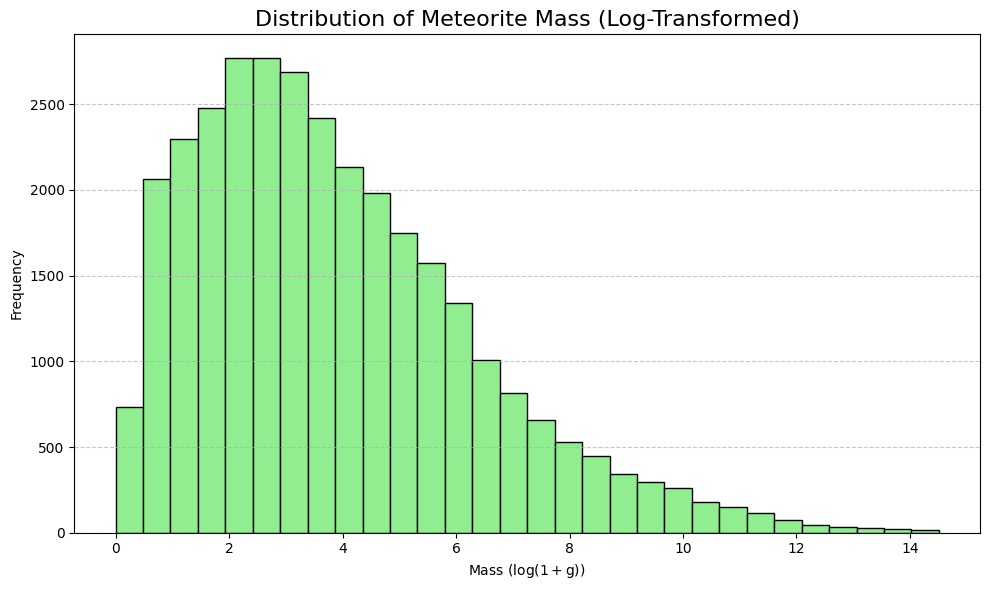

In [29]:



# 1. FINAL RESILIENT LOAD & CLEANING 
file_name = "Meteorite Landing - Meteorite-Landings.csv"
column_data_types = {'Mass': 'object', 'Year': 'object', 'Coordinates': 'object'}
try:
    df = pd.read_csv(file_name, dtype=column_data_types)
except UnicodeDecodeError:
    df = pd.read_csv(file_name, encoding='latin-1', dtype=column_data_types)

#  2. COLUMN TRANSFORMATION AND CREATION 
df['Coordinates'] = df['Coordinates'].astype(str)
df['Clean_Coordinates'] = df['Coordinates'].str.replace('GeoPosition[{', '', regex=False).str.replace('}]', '', regex=False)
coords_split = df['Clean_Coordinates'].str.split(', ', expand=True)
df['Latitude'] = pd.to_numeric(coords_split[0], errors='coerce')
df['Longitude'] = pd.to_numeric(coords_split[1], errors='coerce')

df['Mass'] = df['Mass'].astype(str)
df['Mass_g'] = df['Mass'].str.extract(r'\[(\d+\.?\d*)\,')
df['Mass_g'] = pd.to_numeric(df['Mass_g'], errors='coerce')

df['Year'] = df['Year'].astype(str)
df['Year_of_Fall'] = df['Year'].str.extract(r'\{(\d{4})\}')
df['Year_of_Fall'] = pd.to_numeric(df['Year_of_Fall'], errors='coerce').astype('Int64')

#  3. HANDLING MISSING VALUES & OUTLIERS 
df['Mass_g'].fillna(df['Mass_g'].median(), inplace=True)
df.dropna(subset=['Latitude', 'Longitude', 'Year_of_Fall'], inplace=True)

mass_threshold = df['Mass_g'].quantile(0.999)
df = df[(df['Mass_g'] <= mass_threshold) & (df['Year_of_Fall'] >= 1500) & (df['Year_of_Fall'] <= 2024)].copy()

# 4. DATA PREPARATION FOR PLOTS 
df['Mass_g_log'] = np.log1p(df['Mass_g'])

#  5. MATPLOTLIB PLOTTING 
plt.figure(figsize=(10, 6))
plt.hist(df['Mass_g_log'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Meteorite Mass (Log-Transformed)', fontsize=16)
plt.xlabel(r'Mass ($\log(1 + \text{g})$)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('plot_3_mass_distribution.png')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3208\2232196483.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mass_g'].fillna(df['Mass_g'].median(), inplace=True)


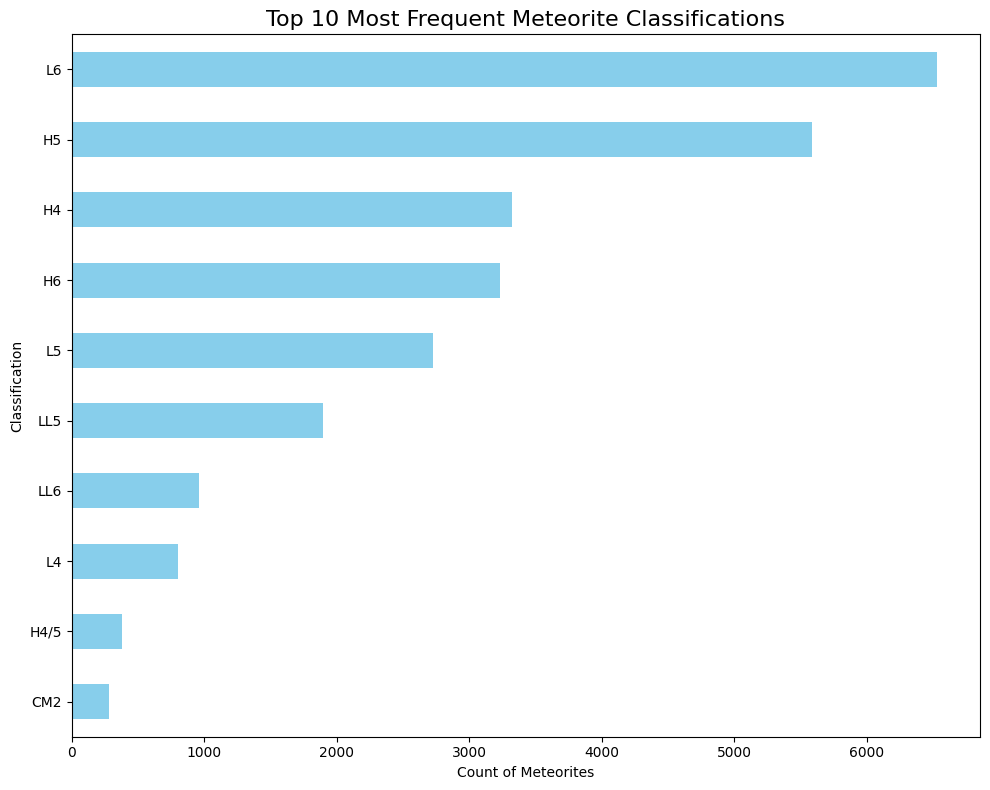

In [ ]:


# 1. FINAL RESILIENT LOAD & CLEANING
file_name = "Meteorite Landing - Meteorite-Landings.csv"
column_data_types = {'Mass': 'object', 'Year': 'object', 'Coordinates': 'object'}
try:
    df = pd.read_csv(file_name, dtype=column_data_types)
except UnicodeDecodeError:
    df = pd.read_csv(file_name, encoding='latin-1', dtype=column_data_types)

#  2. COLUMN TRANSFORMATION AND CREATION 
df['Coordinates'] = df['Coordinates'].astype(str)
df['Clean_Coordinates'] = df['Coordinates'].str.replace('GeoPosition[{', '', regex=False).str.replace('}]', '', regex=False)
coords_split = df['Clean_Coordinates'].str.split(', ', expand=True)
df['Latitude'] = pd.to_numeric(coords_split[0], errors='coerce')
df['Longitude'] = pd.to_numeric(coords_split[1], errors='coerce')

df['Mass'] = df['Mass'].astype(str)
df['Mass_g'] = df['Mass'].str.extract(r'\[(\d+\.?\d*)\,')
df['Mass_g'] = pd.to_numeric(df['Mass_g'], errors='coerce')

df['Year'] = df['Year'].astype(str)
df['Year_of_Fall'] = df['Year'].str.extract(r'\{(\d{4})\}')
df['Year_of_Fall'] = pd.to_numeric(df['Year_of_Fall'], errors='coerce').astype('Int64')

#  3. HANDLING MISSING VALUES & OUTLIERS
df['Mass_g'].fillna(df['Mass_g'].median(), inplace=True)
df.dropna(subset=['Latitude', 'Longitude', 'Year_of_Fall'], inplace=True)

mass_threshold = df['Mass_g'].quantile(0.999)
df = df[(df['Mass_g'] <= mass_threshold) & (df['Year_of_Fall'] >= 1500) & (df['Year_of_Fall'] <= 2024)].copy()

# 4. DATA PREPARATION FOR PLOTS 
top_10_class = df['Classification'].value_counts().nlargest(10)

#  5. MATPLOTLIB PLOTTING 
plt.figure(figsize=(10, 8))
top_10_class.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Frequent Meteorite Classifications', fontsize=16)
plt.xlabel('Count of Meteorites')
plt.ylabel('Classification')
plt.tight_layout()
plt.savefig('plot_1_top_classifications.png')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3208\2804275572.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mass_g'].fillna(df['Mass_g'].median(), inplace=True)


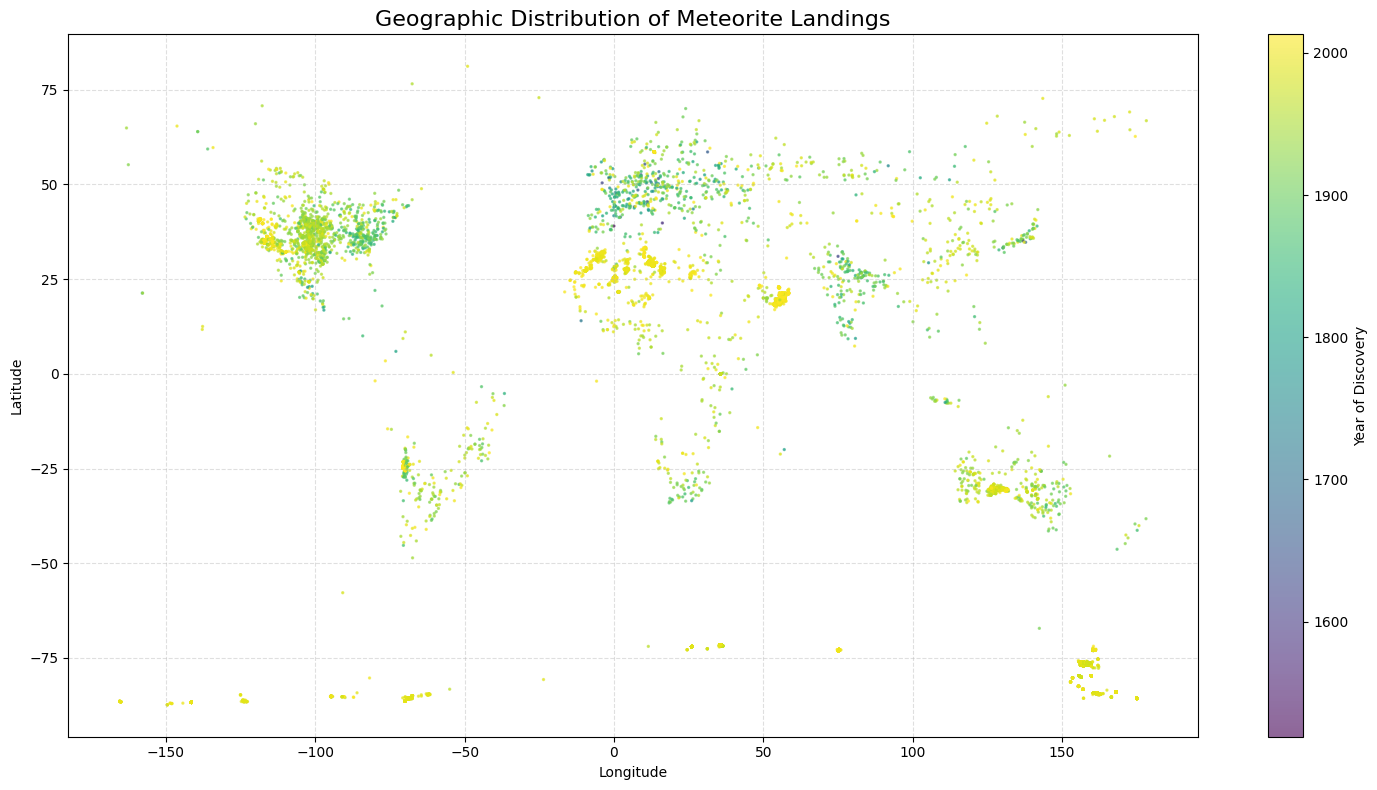

In [ ]:


# 1. FINAL RESILIENT LOAD & CLEANING 
file_name = "Meteorite Landing - Meteorite-Landings.csv"
column_data_types = {'Mass': 'object', 'Year': 'object', 'Coordinates': 'object'}
try:
    df = pd.read_csv(file_name, dtype=column_data_types)
except UnicodeDecodeError:
    df = pd.read_csv(file_name, encoding='latin-1', dtype=column_data_types)

#  2. COLUMN TRANSFORMATION AND CREATION 
df['Coordinates'] = df['Coordinates'].astype(str)
df['Clean_Coordinates'] = df['Coordinates'].str.replace('GeoPosition[{', '', regex=False).str.replace('}]', '', regex=False)
coords_split = df['Clean_Coordinates'].str.split(', ', expand=True)
df['Latitude'] = pd.to_numeric(coords_split[0], errors='coerce')
df['Longitude'] = pd.to_numeric(coords_split[1], errors='coerce')

df['Mass'] = df['Mass'].astype(str)
df['Mass_g'] = df['Mass'].str.extract(r'\[(\d+\.?\d*)\,')
df['Mass_g'] = pd.to_numeric(df['Mass_g'], errors='coerce')

df['Year'] = df['Year'].astype(str)
df['Year_of_Fall'] = df['Year'].str.extract(r'\{(\d{4})\}')
df['Year_of_Fall'] = pd.to_numeric(df['Year_of_Fall'], errors='coerce').astype('Int64')

#  3. HANDLING MISSING VALUES & OUTLIERS 
df['Mass_g'].fillna(df['Mass_g'].median(), inplace=True)
# Retaining only rows with valid coordinates is critical for this map plot
df.dropna(subset=['Latitude', 'Longitude', 'Year_of_Fall'], inplace=True) 

mass_threshold = df['Mass_g'].quantile(0.999)
df = df[(df['Mass_g'] <= mass_threshold) & (df['Year_of_Fall'] >= 1500) & (df['Year_of_Fall'] <= 2024)].copy()

#  4. DATA PREPARATION FOR PLOTS 
# No additional prep needed for the scatter plot other than the cleaned coords

#  5. MATPLOTLIB PLOTTING 
plt.figure(figsize=(15, 8))
# Use size (s) and color (c) to add visual depth to the points
plt.scatter(
    df['Longitude'], 
    df['Latitude'], 
    alpha=0.6, 
    s=2, 
    c=df['Year_of_Fall'], 
    cmap='viridis'
)

plt.title('Geographic Distribution of Meteorite Landings', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Year of Discovery')
plt.grid(axis='both', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('plot_5_geographic_distribution.png')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3208\4274763521.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mass_g'].fillna(df['Mass_g'].median(), inplace=True)


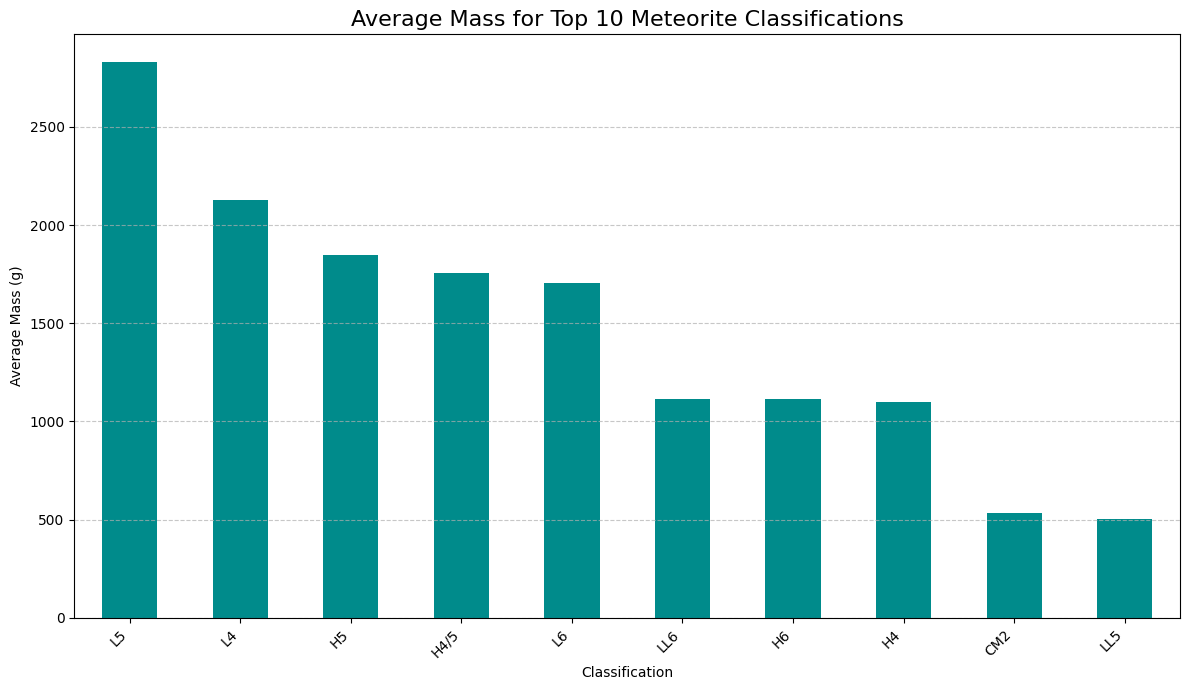

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  1. FINAL RESILIENT LOAD & CLEANING 
file_name = "Meteorite Landing - Meteorite-Landings.csv"
column_data_types = {'Mass': 'object', 'Year': 'object', 'Coordinates': 'object'}
try:
    df = pd.read_csv(file_name, dtype=column_data_types)
except UnicodeDecodeError:
    df = pd.read_csv(file_name, encoding='latin-1', dtype=column_data_types)

#  2. COLUMN TRANSFORMATION AND CREATION 
df['Coordinates'] = df['Coordinates'].astype(str)
df['Clean_Coordinates'] = df['Coordinates'].str.replace('GeoPosition[{', '', regex=False).str.replace('}]', '', regex=False)
coords_split = df['Clean_Coordinates'].str.split(', ', expand=True)
df['Latitude'] = pd.to_numeric(coords_split[0], errors='coerce')
df['Longitude'] = pd.to_numeric(coords_split[1], errors='coerce')

df['Mass'] = df['Mass'].astype(str)
df['Mass_g'] = df['Mass'].str.extract(r'\[(\d+\.?\d*)\,')
df['Mass_g'] = pd.to_numeric(df['Mass_g'], errors='coerce')

df['Year'] = df['Year'].astype(str)
df['Year_of_Fall'] = df['Year'].str.extract(r'\{(\d{4})\}')
df['Year_of_Fall'] = pd.to_numeric(df['Year_of_Fall'], errors='coerce').astype('Int64')

# 3. HANDLING MISSING VALUES & OUTLIERS 
df['Mass_g'].fillna(df['Mass_g'].median(), inplace=True)
df.dropna(subset=['Latitude', 'Longitude', 'Year_of_Fall'], inplace=True)

mass_threshold = df['Mass_g'].quantile(0.999)
df = df[(df['Mass_g'] <= mass_threshold) & (df['Year_of_Fall'] >= 1500) & (df['Year_of_Fall'] <= 2024)].copy()

#  4. DATA PREPARATION FOR PLOTS 
# Find top 10 classifications by count
top_10_names = df['Classification'].value_counts().nlargest(10).index
# Filter data to only include the top 10
df_top_10 = df[df['Classification'].isin(top_10_names)]
# Calculate the average mass for these top 10
avg_mass_by_class = df_top_10.groupby('Classification')['Mass_g'].mean().sort_values(ascending=False)

#  5. MATPLOTLIB PLOTTING 
plt.figure(figsize=(12, 7))
avg_mass_by_class.plot(kind='bar', color='darkcyan')
plt.title('Average Mass for Top 10 Meteorite Classifications', fontsize=16)
plt.xlabel('Classification')
plt.ylabel('Average Mass (g)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('plot_6_avg_mass_by_class.png')
plt.show()